In [1]:
suppressWarnings(suppressPackageStartupMessages({
    library(tidyverse)
    library(data.table)
}))


In [102]:
source('0_parameters.sh')


In [93]:
source('plot_functions.R')


In [3]:
f <- file.path(data_scratch_d, 'UKB_PRS_PheWAS/HGIrel5.PRS_PheWAS.tsv.gz')


In [87]:
f %>% fread(colClasses = c('GBE_ID'='character')) %>%
rename('HGI_case_control'='#HGI_case_control')  %>%
mutate(
    plot_color = str_replace_all(GBE_category, '_', ' '),
    plot_shape = if_else(estimate > 0, '+', '-')
) -> df


In [107]:
HGI_case_controls <- c('B2', 'C2', 'B1', 'A2')
HGI_suffices <- c(
    'leave_23andme',
    'leave_UKBB_23andme',
    'eur_leave_23andme',
    'eur_leave_ukbb_23andme'
)
clump_p1s <- c(1e-5, 1e-4, 1e-3)


In [108]:
for(clumpp in clump_p1s){
for(HGI_cc in HGI_case_controls){
for(HGI_sx in HGI_suffices){
    clumpp_str <- str_replace(sprintf('%.0e', clumpp), '0', '')
    
    out_f <- file.path(
        repo_fig_d, 'UKB_PRS_PheWAS', HGI_sx, sprintf(
            'HGIrel5_%s_%s.clump%s.png', HGI_cc, HGI_sx, clumpp_str
        )
    )

    if(!dir.exists(dirname(dirname(out_f)))) dir.create(dirname(dirname(out_f)))
    if(!dir.exists(dirname(out_f))) dir.create(dirname(out_f))


    tryCatch({

        df %>% filter(
            HGI_case_control == HGI_cc, 
            HGI_suffix == HGI_sx,
            clump_p1 == clumpp, 
            P < 1e-4
        ) %>% p_PRS_phewas() +
        labs(title = sprintf("%s, clump p1: %s, %s", HGI_cc, str_replace(sprintf('%.0e', clumpp), '0', ''), HGI_sx)) -> p

        ggsave(file=out_f, p, width=8, height=8)
        ggsave(file=str_replace(out_f, '.png$', '.pdf'), p, width=16, height=16)
              
    }, error=function(e){})
    
}}}


In [88]:
df %>% colnames()

[1] "HGI_case_control" "HGI_suffix"       "clump_p1"         "GBE_category"    
 [5] "GBE_ID"           "GBE_short_name"   "estimate"         "SE"              
 [9] "z_or_t_value"     "P"                "plot_color"       "plot_shape"

In [94]:
df %>%
filter(
    HGI_case_control == 'B2', 
    HGI_suffix == 'eur_leave_ukbb_23andme',
    clump_p1 == 1e-5
) %>%
select(-HGI_case_control, -HGI_suffix, -clump_p1) %>%
arrange(P) %>%
head(10)

GBE_category,GBE_ID,GBE_short_name,estimate,SE,z_or_t_value,P,plot_color,plot_shape
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
Biomarkers,INI10030610,Alkaline phosphatase,-0.005770931,0.0004745987,-12.159600,5.190101e-34,Biomarkers,-
Blood_assays,INI30190,Monocyte %,-0.050301629,0.0046175429,-10.893592,1.250235e-27,Blood assays,-
Blood_assays,INI30610,Alkaline phosphatase,-0.478839976,0.0458122544,-10.452225,1.444830e-25,Blood assays,-
Blood_assays,INI30130,Monocyte count,-0.003785308,0.0003801780,-9.956674,2.376329e-23,Blood assays,-
Biomarkers,INI10030650,Aspartate aminotransferase,-0.002244956,0.0004678284,-4.798675,1.597911e-06,Biomarkers,-
Health_and_medical_history,BIN_FC1006149,Mouth ulcers,-0.025612879,0.0056343077,-4.545879,5.470655e-06,Health and medical history,-
Blood_assays,INI30270,Mean sphered cell volume,0.041494609,0.0092539778,4.483975,7.329031e-06,Blood assays,+
Blood_assays,INI30650,Aspartate aminotransferase,-0.077857015,0.0183210694,-4.249589,2.142234e-05,Blood assays,-
Blood_assays,INI30050,Mean corpuscular haemoglobin,0.012341910,0.0031452417,3.923994,8.711065e-05,Blood assays,+


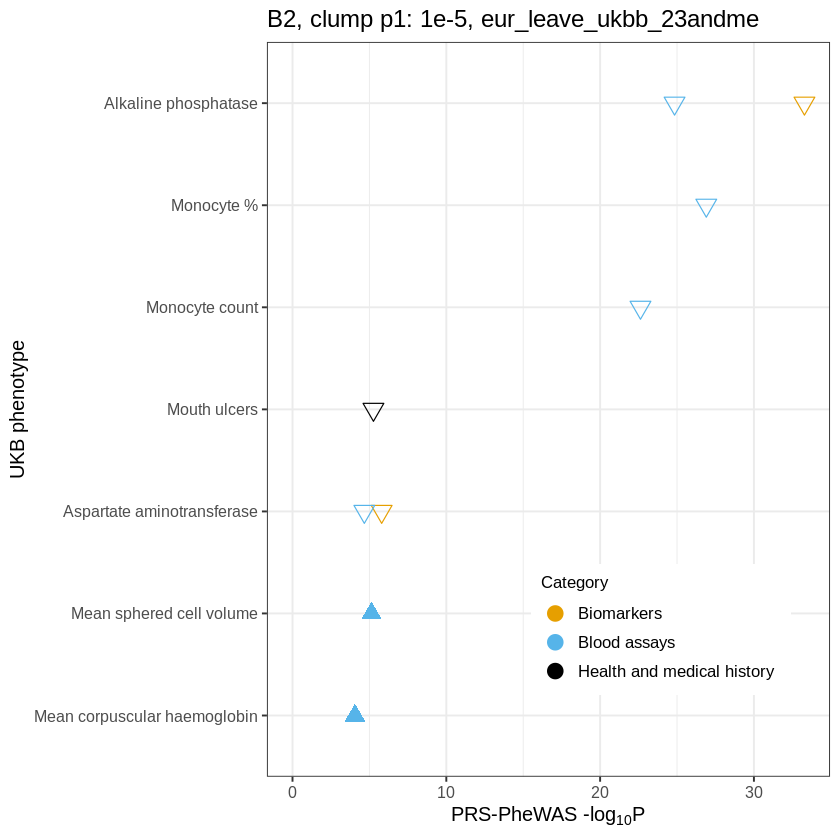

In [98]:
df %>%
filter(
    HGI_case_control == HGI_cc, 
    HGI_suffix == HGI_sx,
    clump_p1 == clumpp, 
    P < 1e-4
) %>% p_PRS_phewas() +
labs(title = sprintf("%s, clump p1: %s, %s", HGI_cc, str_replace(sprintf('%.0e', clumpp), '0', ''), HGI_sx)) +
scale_color_manual(values=setNames(
    c(cb.colors[['orange']], cb.colors[['sky.blue']], cb.colors[['black']]), 
    c('Biomarkers', 'Blood assays', 'Health and medical history')
))



In [8]:
df %>%
filter(
    HGI_case_control == 'B2', 
    HGI_suffix == 'eur_leave_ukbb_23andme',
    clump_p1 == 1e-4
) %>%
select(-HGI_case_control, -HGI_suffix, -clump_p1) %>%
arrange(P) %>%
head(10)

GBE_category,GBE_ID,GBE_short_name,estimate,SE,z_or_t_value,P
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
Biomarkers,INI10030610,Alkaline phosphatase,-0.0045647257,4.745551e-04,-9.618959,6.695834e-22
Blood_assays,INI30610,Alkaline phosphatase,-0.3806696742,4.580715e-02,-8.310268,9.585018e-17
Blood_assays,INI30190,Monocyte %,-0.0366606987,4.617200e-03,-7.940029,2.027685e-15
Blood_assays,INI30130,Monocyte count,-0.0028959197,3.801413e-04,-7.618010,2.583034e-14
Blood_assays,INI30050,Mean corpuscular haemoglobin,0.0143473218,3.144718e-03,4.562356,5.060114e-06
Health_and_medical_history,BIN_FC1006149,Mouth ulcers,-0.0235425794,5.593411e-03,-4.208984,2.565214e-05
Blood_assays,INI30270,Mean sphered cell volume,0.0368488585,9.252606e-03,3.982538,6.819801e-05
Blood_assays,INI30090,Platelet crit,-0.0003163433,8.129068e-05,-3.891508,9.964264e-05
Blood_assays,INI30080,Platelet count,-0.3895124989,1.009837e-01,-3.857181,1.147243e-04


In [9]:
df %>%
filter(
    HGI_case_control == 'B2', 
    HGI_suffix == 'eur_leave_ukbb_23andme',
    clump_p1 == 1e-3
) %>%
select(-HGI_case_control, -HGI_suffix, -clump_p1) %>%
arrange(P) %>%
head(10)

GBE_category,GBE_ID,GBE_short_name,estimate,SE,z_or_t_value,P
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
Blood_assays,INI30190,Monocyte %,-0.027596190,0.004617119,-5.976928,2.276183e-09
Blood_assays,INI30130,Monocyte count,-0.002142395,0.000380134,-5.635895,1.742944e-08
Anthropometry,INI23128,Trunk fat mass,0.040977987,0.008892787,4.608003,4.067064e-06
Anthropometry,INI23127,Trunk fat %,0.057371167,0.012452889,4.607057,4.085600e-06
Anthropometry,INI23119,Arm fat % (R),0.058864181,0.012867884,4.574503,4.775233e-06
Anthropometry,INI23123,Arm fat % (L),0.058078695,0.012985148,4.472702,7.726306e-06
Anthropometry,INI23100,Whole body fat mass,0.070990254,0.015946419,4.451799,8.518162e-06
Blood_assays,INI30270,Mean sphered cell volume,0.040875001,0.009251993,4.417967,9.966588e-06
Anthropometry,INI23099,Body fat %,0.047264604,0.010898340,4.336863,1.445734e-05


In [10]:
df %>%
filter(
    HGI_case_control == 'A2', 
    HGI_suffix == 'eur_leave_ukbb_23andme',
    clump_p1 == 1e-5
) %>%
select(-HGI_case_control, -HGI_suffix, -clump_p1) %>%
arrange(P) %>%
head(10)

GBE_category,GBE_ID,GBE_short_name,estimate,SE,z_or_t_value,P
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
Blood_assays,INI30190,Monocyte %,-0.0427699368,4.616914e-03,-9.263750,1.985148e-20
Blood_assays,INI30130,Monocyte count,-0.0027689484,3.801339e-04,-7.284140,3.244519e-13
Disease_outcome,HC38,Psoriasis,-0.0730343302,1.388839e-02,-5.258661,1.451084e-07
Health_and_medical_history,BIN_FC1006149,Mouth ulcers,-0.0247188626,5.606913e-03,-4.408641,1.040214e-05
Blood_assays,INI30770,IGF-1,-0.0420993981,9.614157e-03,-4.378896,1.193196e-05
Biomarkers,INI10030770,IGF-1,-0.0019423818,4.677123e-04,-4.152941,3.283149e-05
Blood_assays,INI30080,Platelet count,-0.3931616839,1.009809e-01,-3.893427,9.885743e-05
DXA_assessment,INI23262,Gynoid fat mass,90.8717950267,2.345489e+01,3.874321,1.087839e-04
DXA_assessment,INI23265,Gynoid total mass,0.1270349984,3.439187e-02,3.693751,2.241815e-04


In [11]:
df %>%
filter(
    HGI_case_control == 'B1', 
    HGI_suffix == 'eur_leave_ukbb_23andme',
    clump_p1 == 1e-5
) %>%
select(-HGI_case_control, -HGI_suffix, -clump_p1) %>%
arrange(P) %>%
head(10)

GBE_category,GBE_ID,GBE_short_name,estimate,SE,z_or_t_value,P
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
Blood_assays,INI30190,Monocyte %,-0.031185148,0.0046164730,-6.755189,1.428859e-11
Blood_assays,INI30130,Monocyte count,-0.002019783,0.0003800887,-5.313979,1.073267e-07
Blood_assays,INI30260,Mean reticulocyte volume,0.056216472,0.0136063327,4.131640,3.602744e-05
Blood_assays,INI30040,Mean corpuscular volume,0.028203685,0.0075596568,3.730816,1.908931e-04
Disease_outcome,HC842,TTE other paralytic syndromes,0.126714447,0.0354909292,3.570333,3.565273e-04
Disease_outcome,HC34,Pleurisy,0.083196403,0.0235548706,3.532025,4.123896e-04
Blood_assays,INI30050,Mean corpuscular haemoglobin,0.010652927,0.0031441767,3.388145,7.037532e-04
Disease_outcome,HC395,Bladder problem (not cancer),-0.068578787,0.0216983130,-3.160558,1.574670e-03
Mental_health,INI20420,Longest period spent worried or anxious,-7.136601391,2.2751831174,-3.136715,1.710339e-03


In [12]:
df %>%
filter(
    HGI_case_control == 'C2', 
    HGI_suffix == 'eur_leave_ukbb_23andme',
    clump_p1 == 1e-5
) %>%
select(-HGI_case_control, -HGI_suffix, -clump_p1) %>%
arrange(P) %>%
head(10)

GBE_category,GBE_ID,GBE_short_name,estimate,SE,z_or_t_value,P
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
Biomarkers,INI10030610,Alkaline phosphatase,-0.022621075,0.0004732795,-47.796436,0.000000e+00
Blood_assays,INI30610,Alkaline phosphatase,-1.800160231,0.0457362857,-39.359563,0.000000e+00
Biomarkers,INI30030650,AST to ALT ratio,-0.005857344,0.0005301827,-11.047785,2.273839e-28
Health_and_medical_history,BIN_FC11006152,Blood clot or DVT diagnosed by doctor,0.102759890,0.0103910169,9.889301,4.632527e-23
Health_and_medical_history,BIN_FC12006152,Blood clot in the leg (DVT) or lung,0.101529361,0.0103254095,9.832962,8.119471e-23
Disease_outcome,HC987,TTE phlebitis and thrombophlebitis,0.090148326,0.0092894724,9.704354,2.889013e-22
Biomarkers,INI20030780,LDL cholesterol,0.003585569,0.0003912552,9.164272,5.016615e-20
Disease_outcome,HC166,DVT,0.107023009,0.0117307914,9.123256,7.290073e-20
Health_and_medical_history,BIN_FC1006152,DVT diagnosed by doctor,0.104158648,0.0116214357,8.962632,3.170201e-19
